# StationOutput



In [1]:
from axikernels.core.handlers import station_output
import matplotlib.pyplot as plt

In [2]:
my_output = station_output.StationOutput('data/EXAMPLE/output/stations/Station_grid')

In [3]:
my_output.outputs

{'elements': {},
 'stations': {'Station_grid': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/EXAMPLE/output/stations/Station_grid',
   'obspyfied': None}}}

In [4]:
my_output.get_inventory()

/disks/data/PhD/AxiSEM3D_Kernels/axikernels/core/handlers/station_output.py:342: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  stations = (pd.read_csv(self._stations_file_path,


Inventory created at 2024-05-28T13:41:49.292389Z
	Created by: ObsPy 1.4.1
		    https://www.obspy.org
	Sending institution: Inventory from AxiSEM3D STATIONS file
	Contains:
		Networks (2):
			II, IU
		Stations (24):
			II.ABPO ()
			II.ALE ()
			II.ARU ()
			II.ASCN ()
			II.BFO ()
			II.BORG ()
			II.BRVK ()
			II.CMLA ()
			II.COCO ()
			II.DGAR ()
			II.EFI ()
			II.ERM ()
			II.ESK ()
			II.FFC ()
			II.GAR ()
			II.HOPE ()
			II.JTS ()
			II.KAPI ()
			II.KDAK ()
			IU.SBA ()
			IU.SDV ()
			IU.SFJD ()
			IU.SJG ()
			IU.SLBS ()
		Channels (72):
			II.ABPO..UZ, II.ABPO..UR, II.ABPO..UT, II.ALE..UZ, II.ALE..UR, 
			II.ALE..UT, II.ARU..UZ, II.ARU..UR, II.ARU..UT, II.ASCN..UZ, 
			II.ASCN..UR, II.ASCN..UT, II.BFO..UZ, II.BFO..UR, II.BFO..UT, 
			II.BORG..UZ, II.BORG..UR, II.BORG..UT, II.BRVK..UZ, II.BRVK..UR, 
			II.BRVK..UT, II.CMLA..UZ, II.CMLA..UR, II.CMLA..UT, II.COCO..UZ, 
			II.COCO..UR, II.COCO..UT, II.DGAR..UZ, II.DGAR..UR, II.DGAR..UT, 
			II.EFI..UZ, II.EFI..UR, II.EFI..UT,

In [5]:
data = my_output.stream(networks=['II'], station_names=['CMLA'], locations=[''], channels=['UZ'])
print(data)

1 Trace(s) in Stream:
II.CMLA..UZ | 1969-12-31T23:58:57.337500Z - 1970-01-01T00:30:00.001200Z | 6.0 Hz, 11148 samples


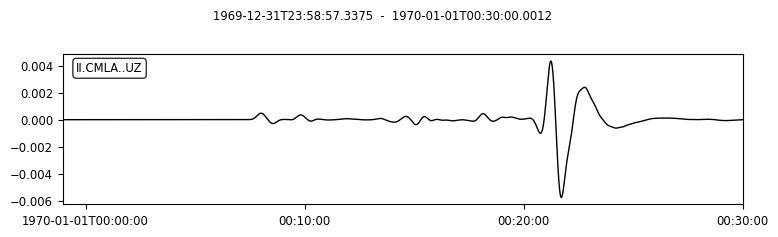

In [6]:
%matplotlib inline
data.plot()
plt.show()